Example: aging and population growth
------------------------------------

The nodes of the diagram will represent the age of an individual in a population.

The transitions corresponding to labels edges $s_i=(i \to i+1)$ represent probability of survival from age $i$ to age $i+1$. 

And the transitions $f_i:(i \to 0)$ represent probability of having an offspring at age $i$.


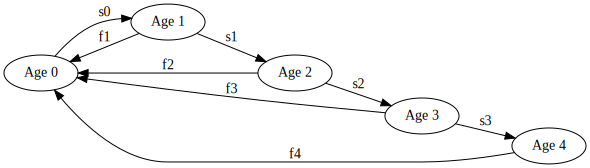

In [1]:
from graphviz import Digraph
elev = Digraph()

pop = Digraph("pop")
pop.attr(rankdir='LR')

p = list(range(5))
with pop.subgraph() as c:
#    c.attr(rank='same')
    for i in p:
        c.node(f"Age {i}")

for i in p:
    if i+1 in p:
        pop.edge(f"Age {i}",f"Age {i+1}",f"s{i}")
    if i != 0:
        pop.edge(f"Age {i}","Age 0",f"f{i}")
    
pop

Interpreting this model
-----------------------

- at time 0, suppose that the size of the population which is of age 0 is equal to $p_0$, the size of the population of age 1 is equal to $p_1$, etc.

  More succinctly, the population is described by the sequence $(p_0,p_1,\dots)$.
  
  Note that the total population is equal to the sum $\displaystyle \sum_{i=0}^\infty p_i$, which looks a bit odd! But, the infinite sum isn't really infinite -- $p_i$ must be equal to 0 for all sufficiently large values of $i$).
  


- at time 1, the size of the population of age 0 is given by

  $\displaystyle f_1 p_1 + f_2 p_2 + \cdots = \sum_{i = 1}^\infty f_i p_i$.
  
  The size of the population of age 1 is given by the product $s_0 \cdot p_0$, and more generally
  for $i \ge 1$ the size of the population of age $i$ is given by $s_{i-1}p_{i-1}$.
  
  Thus the population at time 1 is described by the sequence
  
  $\displaystyle (\sum_{i=1}^\infty f_i p_i,\, s_0p_0,\, s_1p_1,\, \dots)$
  
  And in particular the total population at time 1 is given by
  
  $\displaystyle \sum_{i=1}^\infty f_i p_i + \sum_{j=0}^\infty s_jp_j.$

- at time 2,

  it is easy to see that for $i > 1$, the size of the population of age $i$ is equal to
  $s_{i-1} s_{i-2} p_{i-2}$ 
  
  The sizes of the populations having age $0$ and $1$ have a more complicated description!!
  
Given a "better" description of the population(s) at all times $t \ge 0$, we might hope to answer questions such as: "is the population decaying or growing?"

Matrix description
------------------

We are now going to give a more compact description of the preceding example, under an additional assumption.

Let's suppose that the lifespan of the populace is no more than 7 time units -- i.e. we suppose that $s_{7} = 0$.

Under this assumption, we can represent the population at time $t$ by a vector
$$\mathbf{p}^{(t)} = \begin{bmatrix} p_0 \\ p_1 \\ \vdots \\ p_7 \end{bmatrix} \in \mathbb{R}^{8}$$



If the population at time $t$ is described by $\mathbf{p}^{(t)} = \begin{bmatrix} p_0 \\ p_1 \\ \vdots \\ p_7 \end{bmatrix}$ then the population at time $t+1$ is given by
$$\mathbf{p}^{(t+1)} = \begin{bmatrix} \sum_{i=0}^7 f_i p_i \\ s_0p_0 \\ \vdots \\ s_6 p_6 \end{bmatrix}
= A\mathbf{p}^{(t)}$$
where $$A = \begin{bmatrix}
f_0 & f_1 & f_2 & \cdots & f_6 & f_7 \\
s_0 & 0 & 0  & \cdots & 0 & 0 \\
0 & s_1 & 0  & \cdots & 0 & 0  \\
0 & 0 & s_2  & \cdots & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & \cdots  & s_6 & 0  
\end{bmatrix}.$$


Thus if we begin with population $\mathbf{p}^{(0)} = \begin{bmatrix} p_0 \\ p_1 \\ \vdots \\ p_9 \end{bmatrix}$,
then

$$\mathbf{p}^{(1)} = A \mathbf{p}^{(0)}$$

and

$$\mathbf{p}^{(2)} = A \mathbf{p}^{(1)} = A \cdot A \cdot \mathbf{p}^{(0)} = A^2 \mathbf{p}^{(0)}$$.

where $A^2$ denotes the $A \cdot A$, the *square* or *second power* of the matrix $A$.


In general, for $j \ge 0$ we have
$$\mathbf{p}^{(j)} = A^j \mathbf{p}^{(0)}$$

Thus computing the long-range behaviour of the system amounts to understanding the powers $A^j$ of the $8 \times 8$ matrix $A$.

In particular, we find the total population at time $t$ by computing
$$\begin{bmatrix} 1 & 1 & \cdots & 1 \end{bmatrix} \cdot A \cdot \mathbf{p}^{(t)}.$$



Case ``fA,sA``
----------

Let's compute several $\begin{bmatrix} 1 & 1 & \cdots & 1 \end{bmatrix} \cdot A^j$ for a particular $A$, namely
when we make the following assumptions on the $f_i$ and $s_i$:

```
fA = [.30,.50,.35,.25,.25,.15,.15,.5]
sA = [.30,.60,.55,.50,.30,.15,.05]
```

Remeber that for a given population vector $\mathbf{p}$, the resulting population at time $j$ is given by
$\begin{bmatrix} 1 & 1 & \cdots & 1 \end{bmatrix} \cdot A^j \cdot \mathbf{p}.$ 

In [3]:
import numpy as np
from pprint import pprint 

float_formatter = "{:.4f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})


def sbv(index,size):
    return np.array([1.0 if i == index else 0.0 for i in range(size)])

# can concatenate `numpy` arrays. For example

l = np.array([1,2,3,4])

B = np.array([np.zeros(4),np.zeros(4),np.ones(4)])

l,B

(array([1, 2, 3, 4]),
 array([[0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 1.0000]]))

In [10]:
np.concatenate([[l],B])

array([[1.0000, 2.0000, 3.0000, 4.0000],
       [0.0000, 0.0000, 0.0000, 0.0000],
       [0.0000, 0.0000, 0.0000, 0.0000],
       [1.0000, 1.0000, 1.0000, 1.0000]])

In [4]:


fA = np.array([.30,.50,.35,.25,.25,.15,.15,.5])
sA = np.array([.30,.60,.55,.50,.30,.15,.05])

# we use numpy.linalg.matrix_power to compute powers of a matrix

def onePowers(f,s,iter=20,skip=1):
    # create the "all ones vector" of the appropriate length
    ones = np.ones(len(f))
    
    # create the matrix `A` -- initial row is the vector `f`; subsequent rows are multiples of
    # standard basis vectors
    
    A = np.concatenate([ [f], [ s[i]*sbv(i,len(f)) for i in range(len(sA))] ], axis = 0)

    # computes the product of `ones` and the jth power of the matrix `A`
    # returns the results as a `dictionary` with key `j` and value
    # `ones @ A^j`
    
    s ={ j : ones @ np.linalg.matrix_power(A,j)
         for j in range(0,iter,skip) }
    
    return s

    
onePowers(f=fA,s=sA,iter=35,skip=2)

{0: array([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]),
 2: array([0.5100, 0.8400, 0.6225, 0.4250, 0.2400, 0.1200, 0.1150, 0.3000]),
 4: array([0.3100, 0.4498, 0.2779, 0.1830, 0.1294, 0.0745, 0.0735, 0.2025]),
 6: array([0.1649, 0.2395, 0.1580, 0.1069, 0.0743, 0.0427, 0.0419, 0.1140]),
 8: array([0.0896, 0.1306, 0.0856, 0.0573, 0.0396, 0.0228, 0.0223, 0.0607]),
 10: array([0.0486, 0.0708, 0.0463, 0.0311, 0.0215, 0.0124, 0.0121, 0.0330]),
 12: array([0.0264, 0.0384, 0.0252, 0.0169, 0.0117, 0.0067, 0.0066, 0.0179]),
 14: array([0.0143, 0.0208, 0.0136, 0.0092, 0.0063, 0.0036, 0.0036, 0.0097]),
 16: array([0.0078, 0.0113, 0.0074, 0.0050, 0.0034, 0.0020, 0.0019, 0.0053]),
 18: array([0.0042, 0.0061, 0.0040, 0.0027, 0.0019, 0.0011, 0.0011, 0.0029]),
 20: array([0.0023, 0.0033, 0.0022, 0.0015, 0.0010, 0.0006, 0.0006, 0.0016]),
 22: array([0.0012, 0.0018, 0.0012, 0.0008, 0.0005, 0.0003, 0.0003, 0.0008]),
 24: array([0.0007, 0.0010, 0.0006, 0.0004, 0.0003, 0.0002, 0.0002, 0



The calculations above suggests that 
$$\begin{bmatrix} 1 & 1 & \cdots & 1 \end{bmatrix} \cdot A^j = \mathbf{0} \quad \text{for} \quad j  \ge 34.$$

More precisely, it suggests that the entries of `[1,1,...,1] @ A^j` are 0 to 4 decimal places for `j >= 20.`

Thus with the given matrix $A$, the model suggests that the total population will decay to 0.



In [6]:
def computePops(apowers,pop):
    # arguments: apowers should be a dictionary. keys: natural numbers `j`
    #                                            vals: powers of a matrix
    #            pop should be a population vector
    return {j: float(apowers[j] @ pop) for j in apowers.keys()} 

p = 1000]0*sbv(0,8)


pprint(computePops(onePowers(f=fA,s=sA,iter=50,skip=5),p))


{0: 10000.0,
 5: 2279.7000000000003,
 10: 486.49829174999985,
 15: 105.44460476708812,
 20: 22.86189433640572,
 25: 4.956817513272183,
 30: 1.074715966150294,
 35: 0.2330153182348078,
 40: 0.05052138448099017,
 45: 0.010953830457210061}


# Case `fB,sB`

Now let's consider different probabilities, as follows:

```
fB = [.50,.70,.55,.35,.35,.15,.15,.5]
sB = [.40,.70,.55,.50,.35,.15,.05]
```

In [9]:
fB = [.50,.70,.55,.35,.35,.15,.15,.5]
sB = [.40,.70,.55,.50,.35,.15,.05,0]

pprint(onePowers(f=fB,s=sB,iter=40,skip=2))

{0: array([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]),
 2: array([1.0100, 1.4000, 0.9625, 0.6650, 0.4200, 0.1650, 0.1600, 0.4500]),
 4: array([1.0848, 1.3904, 0.8957, 0.5784, 0.4342, 0.1859, 0.1850, 0.5325]),
 6: array([1.1038, 1.4093, 0.9324, 0.6069, 0.4512, 0.1932, 0.1919, 0.5493]),
 8: array([1.1280, 1.4395, 0.9501, 0.6174, 0.4585, 0.1963, 0.1949, 0.5578]),
 10: array([1.1518, 1.4698, 0.9701, 0.6307, 0.4684, 0.2005, 0.1992, 0.5699]),
 12: array([1.1760, 1.5009, 0.9906, 0.6440, 0.4783, 0.2048, 0.2034, 0.5819]),
 14: array([1.2009, 1.5326, 1.0115, 0.6576, 0.4884, 0.2091, 0.2077, 0.5942]),
 16: array([1.2262, 1.5649, 1.0329, 0.6714, 0.4987, 0.2135, 0.2120, 0.6067]),
 18: array([1.2521, 1.5979, 1.0547, 0.6856, 0.5092, 0.2180, 0.2165, 0.6195]),
 20: array([1.2785, 1.6317, 1.0769, 0.7001, 0.5199, 0.2226, 0.2211, 0.6326]),
 22: array([1.3055, 1.6661, 1.0996, 0.7149, 0.5309, 0.2273, 0.2257, 0.6460]),
 24: array([1.3330, 1.7012, 1.1228, 0.7299, 0.5421, 0.2321, 0.2305, 0



In this case, note that the first entry of the vector $$\begin{bmatrix} 1 & 1 & \cdots & 1 \end{bmatrix} \cdot A^j$$
appears to be an increasing function of $j$.

Thus, for example we expect that given an initial population $\mathbf{p}^{(0)}$ with $p_0 >0$, the total population is increasing as a function of $j$, rather than decaying.

In [10]:

p = 10*sbv(1,8)
computePops(onePowers(f=fB,s=sB,iter=35,skip=2),p)

{0: 10.0,
 2: 14.0,
 4: 13.903749999999997,
 6: 14.09307375,
 8: 14.395446012500003,
 10: 14.698376510562499,
 12: 15.009134707542495,
 14: 15.32576804382739,
 16: 15.64915344740065,
 18: 15.979365419542349,
 20: 16.316544682458225,
 22: 16.66083872081138,
 24: 17.012397659577296,
 26: 17.371374818386656,
 28: 17.737926723635336,
 30: 18.112213209479314,
 32: 18.49439748268312,
 34: 18.884646193788285}